In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("../data/cleaned/cleaned_reviews.csv")
df.head()


,review,sentiment,clean_review,old_length,new_length
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1761,1665
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,998,936
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,926,874
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,748,685
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1317,1237


In [3]:
X = df["clean_review"]
y = df["sentiment"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 40000
Test size: 10000


In [5]:
tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [6]:
log_reg = LogisticRegression(max_iter=200, n_jobs=-1)
log_reg.fit(X_train_vec, y_train)
log_preds = log_reg.predict(X_test_vec)
log_acc = accuracy_score(y_test, log_preds)

print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 0.8967


In [7]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)
svm_preds = svm.predict(X_test_vec)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.8969


In [8]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf.fit(X_train_vec, y_train)
rf_preds = rf.predict(X_test_vec)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)



Random Forest Accuracy: 0.8661


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_preds = knn.predict(X_test_vec)
knn_acc = accuracy_score(y_test, knn_preds)

print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.7737


In [10]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest", "KNN"],
    "Accuracy": [log_acc, svm_acc, rf_acc, knn_acc]
})

results


,Model,Accuracy
0,Logistic Regression,0.8967
1,SVM,0.8969
2,Random Forest,0.8661
3,KNN,0.7737


/var/folders/wr/5x3xw27s1b5_lg8hmkjg1wsm0000gn/T/ipykernel_2733/3722003178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")


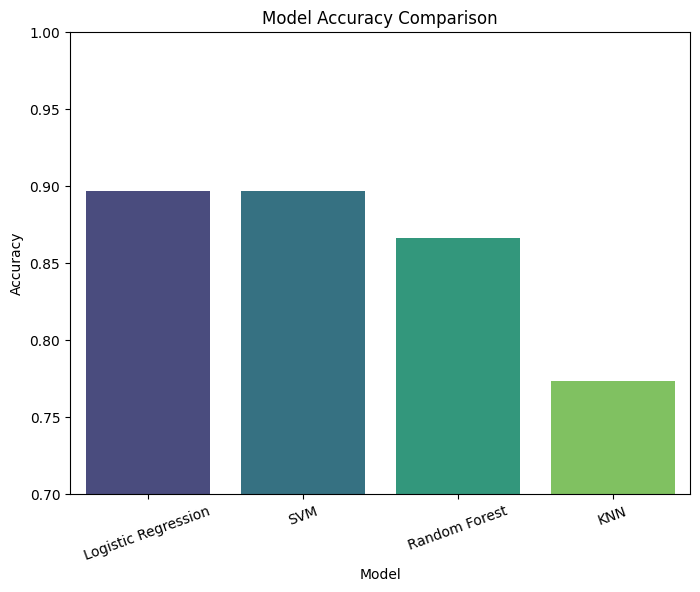

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.xticks(rotation=20)
plt.show()



=== Logistic Regression ===


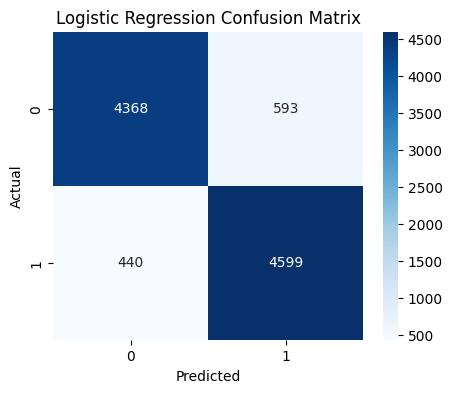


=== SVM ===


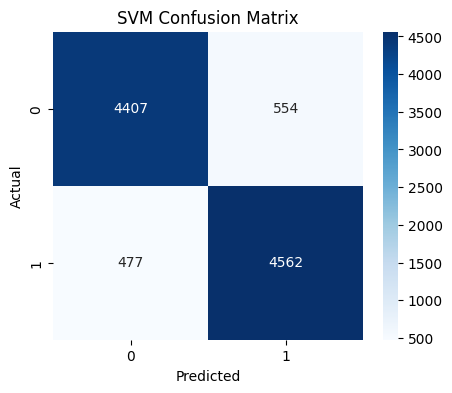


=== Random Forest ===


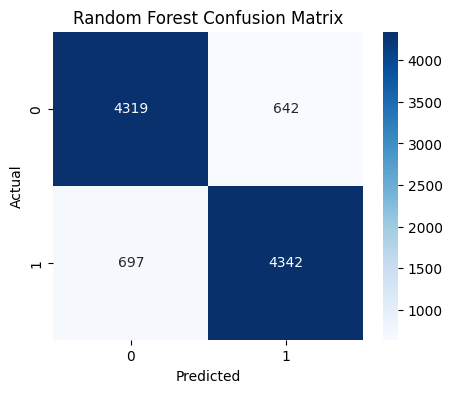


=== KNN ===


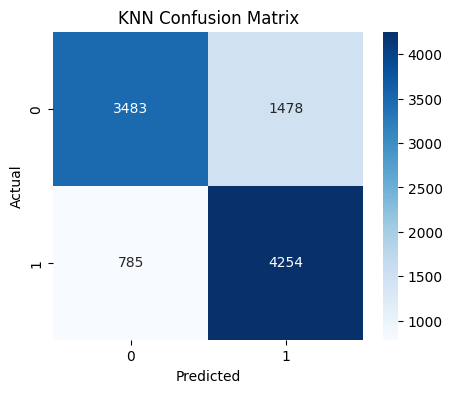

In [12]:
models = {
    "Logistic Regression": log_preds,
    "SVM": svm_preds,
    "Random Forest": rf_preds,
    "KNN": knn_preds
}

for name, preds in models.items():
    print(f"\n=== {name} ===")
    cm = confusion_matrix(y_test, preds)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [13]:
best_model = results.iloc[results['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)



Best Model:
Model          SVM
Accuracy    0.8969
Name: 1, dtype: object
